In [1]:
using Revise
using QuantumOptics
using LaTeXStrings
import PyPlot
import StochasticDiffEq
const plt = PyPlot

┌ Info: Precompiling Revise [295af30f-e4ad-537b-8983-00126c2a3abe]
└ @ Base loading.jl:1260


PyPlot

In [2]:
# set some plot configs
plt.matplotlib.rc("xtick", top=false)
plt.matplotlib.rc("ytick", right=false, left=false)
plt.matplotlib.rc("axes", labelsize=20, titlesize=20, grid=true)
plt.matplotlib.rc("axes", linewidth=2)
plt.matplotlib.rc("grid", alpha=0.25, linestyle="--")
plt.matplotlib.rc("font", family="Palatino", weight="medium")
plt.matplotlib.rc("figure", figsize=(8,4))
plt.matplotlib.rc("xtick.major", width=2)
plt.matplotlib.rc("ytick.major", width=2)

In [3]:
Nc = 50
Γ = 0.5
n̄ = 5
νeff = 10.0

basis = FockBasis(Nc)
a = destroy(basis)
Ht = -νeff * dagger(a) * a
Jtt1(Γ) = [sqrt(2Γ) * a]
Jtt2(Γ) = [sqrt(2Γ) * dagger(a) * a]
Jtt3(Γ) = [sqrt(2Γ * (n̄ + 1)) * a, sqrt(2Γ * n̄) * dagger(a)]
Jtt4(Γ) = [sqrt(2Γ) * number(basis)]

T = 1 / (log((1 / n̄) + 1))
hf = create(basis) * destroy(basis)
if n̄ ≡ 0
    ρ₀ = fockstate(basis, 0) ⊗ dagger(fockstate(basis, 0))
else
    ρ₀ = thermalstate(hf, T)
end
dτ = 0.001
τmax = 100
τ = [0:dτ:τmax;]
corr11 = timecorrelations.correlation(τ, ρ₀, Ht, Jtt4(1), dagger(a) + a,  dagger(a) + a)
corr12 = timecorrelations.correlation(τ, ρ₀, Ht, Jtt3(1), dagger(a) + a,  dagger(a) + a)
corr21 = timecorrelations.correlation(τ, ρ₀, Ht, Jtt4(5), dagger(a) + a,  dagger(a) + a)
corr22 = timecorrelations.correlation(τ, ρ₀, Ht, Jtt3(5), dagger(a) + a,  dagger(a) + a)
corr31 = timecorrelations.correlation(τ, ρ₀, Ht, Jtt4(10), dagger(a) + a,  dagger(a) + a)
corr32 = timecorrelations.correlation(τ, ρ₀, Ht, Jtt3(10), dagger(a) + a,  dagger(a) + a)
# corr3 = timecorrelations.correlation(τ, ρ₀, Ht, Jt3, dagger(a) + a,  dagger(a) + a);

In [4]:
ω, spec11 = timecorrelations.correlation2spectrum(τ, corr11; normalize_spec=false)
ω, spec12 = timecorrelations.correlation2spectrum(τ, corr12; normalize_spec=false)
ω, spec21 = timecorrelations.correlation2spectrum(τ, corr21; normalize_spec=false)
ω, spec22 = timecorrelations.correlation2spectrum(τ, corr22; normalize_spec=false)
ω, spec31 = timecorrelations.correlation2spectrum(τ, corr31; normalize_spec=false)
ω, spec32 = timecorrelations.correlation2spectrum(τ, corr32; normalize_spec=false)
# ω, spec3 = timecorrelations.correlation2spectrum(τ, corr3; normalize_spec=false);

In [86]:
# corr_an = @.(im * sin(Δ*τ) * exp(-κ*abs(τ)))#exp(-#n.*exp.(-1.0im*Δ.*τ).*exp.(-κ.*τ)
# spec_an = 2n*κ./((Δ .+ ω).^2 .+ κ^2) + 2.5n*κ./((Δ .- ω).^2 .+ κ^2) #.* coth.(ω .* 1e4 ./ 2)
# spec_an ./= maximum(spec_an);

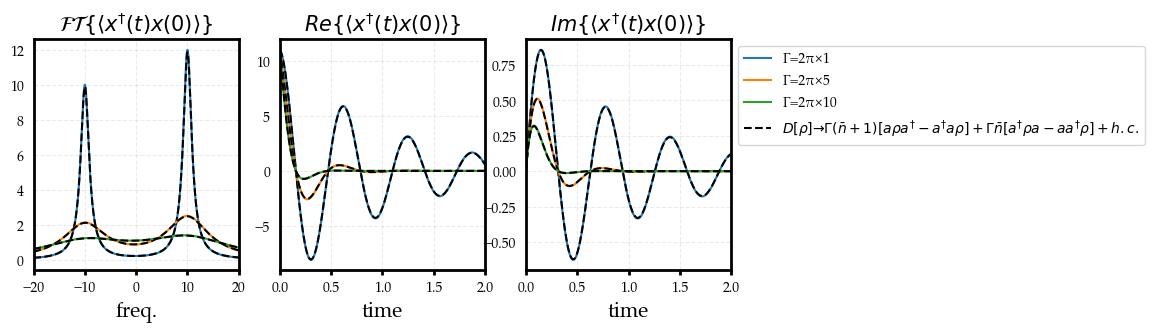

PyObject <matplotlib.legend.Legend object at 0x7f9a79034550>

In [5]:
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.plot(ω, spec11)
plt.plot(ω, spec12, ls="dashed", color="k")
plt.plot(ω, spec21)
plt.plot(ω, spec22, ls="dashed", color="k")
plt.plot(ω, spec31)
plt.plot(ω, spec32, ls="dashed", color="k")
plt.xlim(-20, 20)
plt.xlabel("freq.", fontsize=15)
plt.title(L"\mathcal{FT}\{⟨x^{\dagger}(t)x(0)⟩\}", fontsize=15)

plt.subplot(132)
plt.plot(τ, real(corr11))
plt.plot(τ, real(corr12), ls="--", color="k")
plt.plot(τ, real(corr21))
plt.plot(τ, real(corr22), ls="--", color="k")
plt.plot(τ, real(corr31))
plt.plot(τ, real(corr32), ls="--", color="k")
plt.xlim(0, 2)
plt.xlabel("time", fontsize=15)
plt.title(L"Re\{⟨x^{\dagger}(t)x(0)⟩\}", fontsize=15)

plt.subplot(133)
plt.plot(τ, imag(corr11), label="Γ=2π×1")
plt.plot(τ, imag(corr12), ls="--", color="k")
plt.plot(τ, imag(corr21), label="Γ=2π×5")
plt.plot(τ, imag(corr22), ls="--", color="k")
plt.plot(τ, imag(corr31), label="Γ=2π×10")
plt.plot(τ, imag(corr32), label=L"D[ρ] → Γ(n̄+1)[aρa^† - a^†aρ] + Γn̄[a^†ρa - aa^†ρ] + h.c.", ls="--", color="k")
plt.xlim(0, 2)
plt.xlabel("time", fontsize=15)
plt.title(L"Im\{⟨x^{\dagger}(t)x(0)⟩\}", fontsize=15)
plt.legend(bbox_to_anchor=(1, 1))

# plt.suptitle(L"⟨x^{\dagger}(t)x(0)⟩", fontsize=20, y=1.05)

In [6]:
Nc = 100
Γ = 0.5
n̄ = 10
νeff = 10.0

basis = FockBasis(Nc)
a = destroy(basis)
Ht = -νeff * dagger(a) * a
Jtt1(Γ) = [sqrt(2Γ) * a]
Jtt2(Γ) = [sqrt(2Γ) * dagger(a) * a]
Jtt3(Γ, n̄) = [sqrt(2Γ * (n̄ + 1)) * a, sqrt(2Γ * n̄) * dagger(a)]
Jtt4(Γ) = [sqrt(2Γ) * number(basis)]

function ρ(n̄)
    T = 1 / (log((1 / n̄) + 1))
    hf = create(basis) * destroy(basis)
    if n̄ ≡ 0
        ρ₀ = fockstate(basis, 0) ⊗ dagger(fockstate(basis, 0))
    else
        ρ₀ = thermalstate(hf, T)
    end
    return ρ₀
end
dτ = 0.001
τmax = 100
τ = [0:dτ:τmax;]
corr11 = timecorrelations.correlation(τ, ρ(0), Ht, Jtt4(Γ), dagger(a) + a,  dagger(a) + a)
corr12 = timecorrelations.correlation(τ, ρ(0), Ht, Jtt3(Γ, 0), dagger(a) + a,  dagger(a) + a)
corr21 = timecorrelations.correlation(τ, ρ(5), Ht, Jtt4(Γ), dagger(a) + a,  dagger(a) + a)
corr22 = timecorrelations.correlation(τ, ρ(5), Ht, Jtt3(Γ, 5), dagger(a) + a,  dagger(a) + a)
corr31 = timecorrelations.correlation(τ, ρ(10), Ht, Jtt4(Γ), dagger(a) + a,  dagger(a) + a)
corr32 = timecorrelations.correlation(τ, ρ(10), Ht, Jtt3(Γ, 10), dagger(a) + a,  dagger(a) + a)
# corr3 = timecorrelations.correlation(τ, ρ₀, Ht, Jt3, dagger(a) + a,  dagger(a) + a);

In [7]:
ω, spec11 = timecorrelations.correlation2spectrum(τ, corr11; normalize_spec=false)
ω, spec12 = timecorrelations.correlation2spectrum(τ, corr12; normalize_spec=false)
ω, spec21 = timecorrelations.correlation2spectrum(τ, corr21; normalize_spec=false)
ω, spec22 = timecorrelations.correlation2spectrum(τ, corr22; normalize_spec=false)
ω, spec31 = timecorrelations.correlation2spectrum(τ, corr31; normalize_spec=false)
ω, spec32 = timecorrelations.correlation2spectrum(τ, corr32; normalize_spec=false)
# ω, spec3 = timecorrelations.correlation2spectrum(τ, corr3; normalize_spec=false);

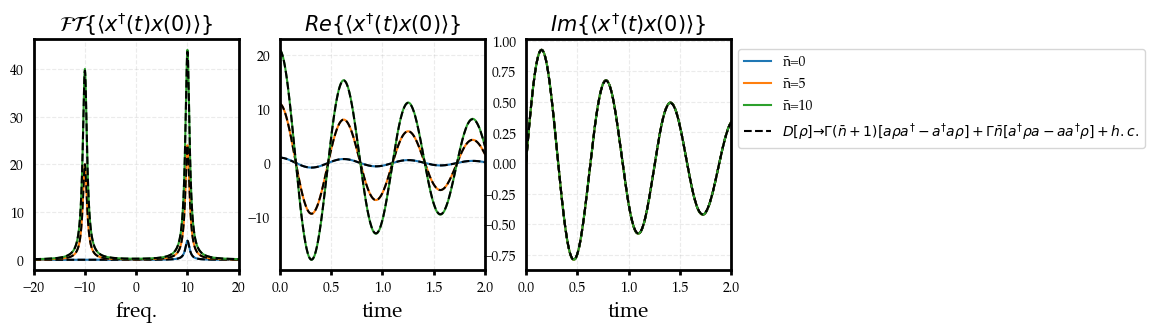

PyObject <matplotlib.legend.Legend object at 0x7f9a78e39490>

In [8]:
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.plot(ω, spec11)
plt.plot(ω, spec12, ls="dashed", color="k")
plt.plot(ω, spec21)
plt.plot(ω, spec22, ls="dashed", color="k")
plt.plot(ω, spec31)
plt.plot(ω, spec32, ls="dashed", color="k")
plt.xlim(-20, 20)
plt.xlabel("freq.", fontsize=15)
plt.title(L"\mathcal{FT}\{⟨x^{\dagger}(t)x(0)⟩\}", fontsize=15)

plt.subplot(132)
plt.plot(τ, real(corr11))
plt.plot(τ, real(corr12), ls="--", color="k")
plt.plot(τ, real(corr21))
plt.plot(τ, real(corr22), ls="--", color="k")
plt.plot(τ, real(corr31))
plt.plot(τ, real(corr32), ls="--", color="k")
plt.xlim(0, 2)
plt.xlabel("time", fontsize=15)
plt.title(L"Re\{⟨x^{\dagger}(t)x(0)⟩\}", fontsize=15)

plt.subplot(133)
plt.plot(τ, imag(corr11), label="n̄=0")
plt.plot(τ, imag(corr12), ls="--", color="k")
plt.plot(τ, imag(corr21), label="n̄=5")
plt.plot(τ, imag(corr22), ls="--", color="k")
plt.plot(τ, imag(corr31), label="n̄=10")
plt.plot(τ, imag(corr32), label=L"D[ρ] → Γ(n̄+1)[aρa^† - a^†aρ] + Γn̄[a^†ρa - aa^†ρ] + h.c.", ls="--", color="k")
plt.xlim(0, 2)
plt.xlabel("time", fontsize=15)
plt.title(L"Im\{⟨x^{\dagger}(t)x(0)⟩\}", fontsize=15)
plt.legend(bbox_to_anchor=(1, 0.5))

# plt.suptitle(L"⟨x^{\dagger}(t)x(0)⟩", fontsize=20, y=1.05)

In [58]:
n̄ = 4
T = 1 / (log((1 / n̄) + 1))
hf = create(basis) * destroy(basis)
if n̄ ≡ 0
    ρ₀ = fockstate(basis, 0) ⊗ dagger(fockstate(basis, 0))
else
    ρ₀ = thermalstate(hf, T)
end
tspan = 0:0.1:100
tout, sol = timeevolution.master(tspan, ρ₀, Ht, Jt1);

UndefVarError: UndefVarError: Jt1 not defined

In [59]:
plt.plot(tout, expect(number(basis), sol))
plt.plot(tout, expect(create(basis) + destroy(basis), sol))
plt.plot(tout, expect(im * (create(basis) - destroy(basis)), sol))

UndefVarError: UndefVarError: sol not defined

In [271]:
n̄ = 4
T = 1 / (log((1 / n̄) + 1))
hf = create(basis) * destroy(basis)
if n̄ ≡ 0
    ρ₀ = fockstate(basis, 0) ⊗ dagger(fockstate(basis, 0))
else
    ρ₀ = thermalstate(hf, T)
end
tspan = 0:1:1000
tout, sol = timeevolution.master(tspan, ρ₀, Ht, Jtt2(10));

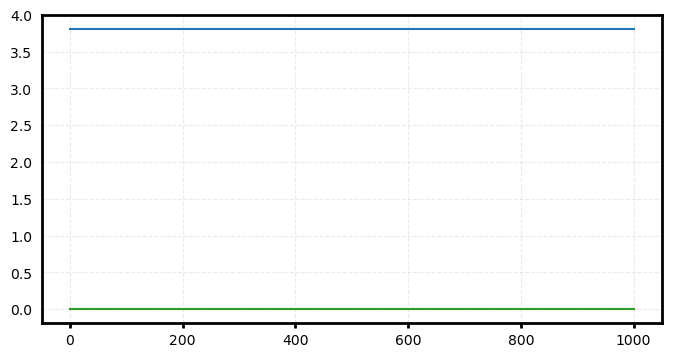

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1d0d2f510>

In [272]:
plt.plot(tout, expect(number(basis), sol))
plt.plot(tout, expect(create(basis) + destroy(basis), sol))
plt.plot(tout, expect(im * (create(basis) - destroy(basis)), sol))

In [329]:
basis1 = FockBasis(10)
Hs1(ν) = 2π * ν * number(basis1)
Hs2(δν) = sqrt(2π * δν / 2) * number(basis1)
tspan = 0:0.1:10
ψ₀ = (fockstate(basis1, 0) + fockstate(basis1, 3))/√2
tsol = 0
Ntraj = 50
for i in 1:Ntraj
#     tout, sol = stochastic.schroedinger(tspan, ψ₀, Hs1(1), Hs2(0.1), dt=1e-4, normalize_state=false, reltol=1e-8, abstol=1e-8)
    tout, sol = stochastic.schroedinger(tspan, ψ₀, Hs1(1), Hs2(0.01), alg=StochasticDiffEq.RKMil{:Stratonovich}(), normalize_state=false)
    tsol ≡ 0 ? tsol = dm.(sol) ./Ntraj : tsol .+= (dm.(sol) ./Ntraj)
end
;

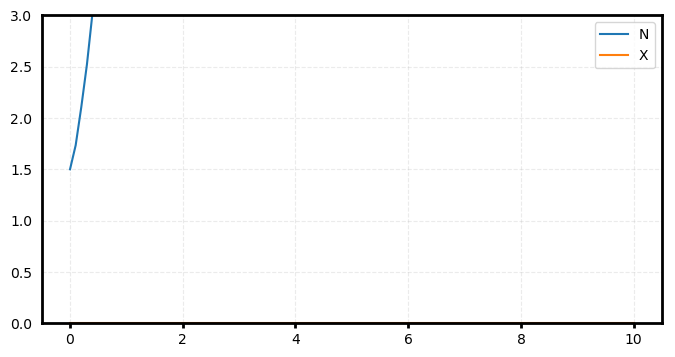

(0, 3)

In [330]:
plt.plot(tspan, expect(number(basis1), tsol), label="N")
plt.plot(tspan, expect(create(basis1) + destroy(basis1), tsol), label="X")
plt.legend()
plt.ylim(0, 3)

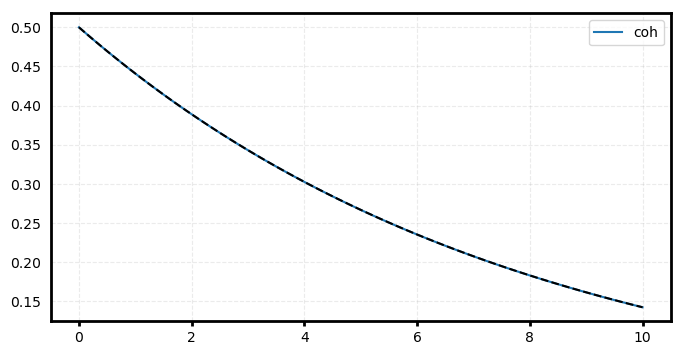

PyObject <matplotlib.legend.Legend object at 0x2583a5910>

In [363]:
n = 2
δν = 0.01
Hs2(ν) = 2π * ν * number(basis)
Jm1(δν) = [sqrt(2π * δν) * number(basis)]
# Jm2(δν) = [sqrt(2π * δν) * (create(basis) + destroy(basis))^2]
ψ₀ = (fockstate(basis, 0) + fockstate(basis, n))/√2
tout, sol = timeevolution.master(tspan, ψ₀, Hs2(1), Jm1(δν))
# plt.plot(tspan, expect(number(basis), sol), label="n")
# plt.plot(tspan, expect(create(basis) + destroy(basis), sol), label="X")
plt.plot(tspan, abs.(expect(fockstate(basis, 0) ⊗ fockstate(basis, n)', sol)), label="coh")
plt.plot(tspan, @.(0.5 * exp(-π*δν*n^2*tspan)), ls="--", color="k")
plt.legend()